 # Settings

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scikit_posthocs as sp
from pathlib import Path
from scipy.stats import shapiro, wilcoxon, levene, fligner, kruskal

In [103]:
CONFIGS_DIR = Path('config')
FIGURES_DIR = Path('figures')

if not FIGURES_DIR.exists():
    FIGURES_DIR.mkdir()

In [104]:
sns.set_theme(style="whitegrid", context="paper", palette="colorblind", color_codes=True, font_scale=1.5)
plt.style.use(CONFIGS_DIR / "figures.mplstyle")

# Load results file

In [105]:
df = pd.read_csv("data/measurements.csv")

In [106]:
df

,image_path,algorithm,K,previous_fen,true_fen,predicted_fen,true_move_uci,true_move,predicted_move_uci,predicted_move,...,pieces_black,legal_moves,prediction_time,energy_total_codecarbon,energy_cpu_codecarbon,energy_gpu,energy_ram,energy_co2,energy_cpu_amd,energy_total
0,out/images\match-20240630T213748\move-17.png,IA,-1.0,r1q2rk1/1pp2ppp/p1np1n2/2b1p3/2P3b1/P1N1P1PP/1...,r2q1rk1/1pp2ppp/p1np1n2/2b1p3/2P3b1/P1N1P1PP/1...,r1q2rk1/1pp2ppp/p1np1n2/2b1p3/2P3b1/P1N1P1PP/1...,c8d8,Qd8,NaN,NaN,...,16,45,0.305875,46.052663,33.718580,3.087002,9.247081,0.000003,6.760266,19.094349
1,out/images\match-20240630T200952\move-56.png,IA,-1.0,1rb1nk2/p1r1np1p/Ppp3p1/8/1P1NP3/1N3qP1/4P2P/2...,1rb1nk2/p1r1np1p/Ppp3p1/8/1P1NP3/1N3PP1/7P/2RR...,1rb1nk2/p1r1np1p/Ppp3p1/8/1P1NP3/1N3PP1/7P/2RR...,e2f3,exf3,e2f3,exf3,...,13,29,0.255584,93.813694,73.822834,6.468005,13.522854,0.000006,5.239871,25.230730
2,out/images\match-20240630T213748\move-82.png,IA,-1.0,6b1/8/p5kp/5p1N/4R1P1/P3r2P/7K/2r1B3 w - - 1 41,6b1/8/p5kp/5p1N/6P1/P3R2P/7K/2r1B3 b - - 1 41,6b1/8/p5kp/5p1N/6P1/P3R2P/7K/2r1B3 b - - 0 41,e4e3,Rxe3,e4e3,Rxe3,...,7,28,0.267126,88.268908,69.724029,5.041004,13.503874,0.000005,4.858727,23.403605
3,out/images\match-20240630T200952\move-82.png,IA,-1.0,2R5/p1r4p/Pp1kBnp1/1p3p2/1n3P1P/1N4P1/4R3/6K1 ...,2R5/p2r3p/Pp1kBnp1/1p3p2/1n3P1P/1N4P1/4R3/6K1 ...,2r5/p6p/Pp1kBnp1/1p3p2/1n3P1P/1N4P1/4R3/6K1 w ...,c7d7,Rd7,c7c8,Rxc8,...,10,30,0.279235,90.380841,71.323206,5.178004,13.879630,0.000005,5.206433,24.264067
4,out/images\match-20240630T213748\move-25.png,IA,-1.0,r2q1rk1/1pp2ppp/pbnp1nb1/8/2PPBPP1/P1N4P/1P2N3...,r2q1rk1/1pp2ppp/pbnp1nb1/8/2PP1PP1/P1N4P/1P2N1...,r2q1rk1/1pp2ppp/pbnp1nB1/8/2PP1PP1/P1N4P/1P2N3...,e4g2,Bg2,e4g6,Bxg6,...,15,40,0.344056,92.116999,73.933352,3.667003,14.516644,0.000006,6.504124,24.687771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,out/images\match-20240630T200952\move-90.png,TK,10.0,2R5/p1rR3p/Ppk1Bnp1/1N3p2/1n3P1P/6P1/3p4/6K1 w...,2R5/p1r4p/Ppk1Bnp1/1N3p2/1n3P1P/6P1/3R4/6K1 w ...,2R5/p1r4p/Ppk1Bnp1/1N3p2/1n3P1P/6P1/3R4/6K1 b ...,d7d2,Rxd2,d7d2,Rxd2,...,10,39,0.610755,146.475364,115.425464,4.791004,26.258896,0.000009,11.592028,42.641928
27996,out/images\match-20240630T213748\move-65.png,TK,10.0,3Qr1b1/5ppk/p6p/4NP2/1B4P1/P6P/3r4/4RR1K b - -...,3rr1b1/5ppk/p6p/4NP2/1B4P1/P6P/8/4RR1K b - - 2 33,3rr1b1/5ppk/p6p/4NP2/1B4P1/P6P/8/4RR1K w - - 0 34,d2d8,Rdxd8,d2d8,Rdxd8,...,8,25,0.474717,149.062226,111.957861,11.905010,25.199355,0.000009,9.467970,46.572335
27997,out/images\match-20240630T213748\move-54.png,TK,10.0,r3r2k/4Bppb/p6p/4NPq1/5BP1/P4Q1P/8/R4R1K b - -...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,g5e7,Qxe7,g5e7,Qxe7,...,9,26,0.444424,141.020946,111.027398,5.198004,24.795544,0.000009,8.550828,38.544377
27998,out/images\match-20240630T213748\move-54.png,TK,7.0,r3r2k/4Bppb/p6p/4NPq1/5BP1/P4Q1P/8/R4R1K b - -...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,g5e7,Qxe7,g5e7,Qxe7,...,9,26,0.423053,139.120284,109.345922,5.099004,24.675358,0.000008,8.560971,38.335333


In [107]:
df.columns

Index(['image_path', 'algorithm', 'K', 'previous_fen', 'true_fen',
       'predicted_fen', 'true_move_uci', 'true_move', 'predicted_move_uci',
       'predicted_move', 'correct', 'turn', 'correct_squares', 'pieces_white',
       'pieces_black', 'legal_moves', 'prediction_time',
       'energy_total_codecarbon', 'energy_cpu_codecarbon', 'energy_gpu',
       'energy_ram', 'energy_co2', 'energy_cpu_amd', 'energy_total'],
      dtype='object')

# Initial preprocessing:

- Rename column of CPU: This is to ensure that both the code of Codecarbon and the code of AMD uProf work well here in terms of having the same column names

- Define `algorithms` and `Ks` variables

- add a column `order` to order algorithms in chronological order

In [108]:
if 'energy_cpu_amd' in df.columns:
  df['energy_cpu'] = df['energy_cpu_amd']
else:
  df['energy_cpu'] = df['energy_cpu_codecarbon']

In [109]:
df.algorithm.unique()

array(['IA', 'CPA', 'CPS', 'SD', 'ESD', 'TK'], dtype=object)

In [110]:
algorithms = np.unique(df.algorithm)
algorithms

array(['CPA', 'CPS', 'ESD', 'IA', 'SD', 'TK'], dtype=object)

In [111]:
Ks = np.unique(df[df.algorithm=="TK"].K)
Ks

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [112]:
df['alg_K'] = df['algorithm'] + df['K'].apply(lambda x: str(int(x)) if x != -1 else "") #
df['alg_K'].unique()

array(['IA', 'CPA', 'CPS', 'SD', 'ESD', 'TK2', 'TK3', 'TK4', 'TK5', 'TK6',
       'TK7', 'TK8', 'TK9', 'TK10'], dtype=object)

In [113]:
order_algorithm = {
    'IA':0, 'CPA':1, 'CPS':2, 'TK':3, 'SD':4, 'ESD':5,
    'TK1':3.01, 'TK2':3.02, 'TK3':3.03, 'TK4':3.04, 'TK5':3.05, 'TK6':3.06,
    'TK7':3.07, 'TK8':3.08, 'TK9':3.09, 'TK10':3.10, 'TK11':3.11, 'TK12':3.12,
    'TK13':3.13, 'TK14':3.14, 'TK15':3.15, 'TK16':3.16
    }
def sort_algorithm(x):
  return x.map(order_algorithm)

df = df.sort_values(by=['alg_K'], key=sort_algorithm)

# Univariate analysis

## System accuracy

In [114]:
df.groupby('algorithm').correct.mean()

algorithm
CPA    0.794500
CPS    0.968500
ESD    0.000000
IA     0.786000
SD     0.000000
TK     0.968444
Name: correct, dtype: float64

In [115]:
df.query("K > 0").groupby(['algorithm', 'K']).correct.mean()

algorithm  K   
TK         2.0     0.9680
           3.0     0.9685
           4.0     0.9685
           5.0     0.9685
           6.0     0.9685
           7.0     0.9685
           8.0     0.9685
           9.0     0.9685
           10.0    0.9685
Name: correct, dtype: float64

In [116]:
df.groupby('alg_K').correct.mean()

alg_K
CPA     0.7945
CPS     0.9685
ESD     0.0000
IA      0.7860
SD      0.0000
TK10    0.9685
TK2     0.9680
TK3     0.9685
TK4     0.9685
TK5     0.9685
TK6     0.9685
TK7     0.9685
TK8     0.9685
TK9     0.9685
Name: correct, dtype: float64

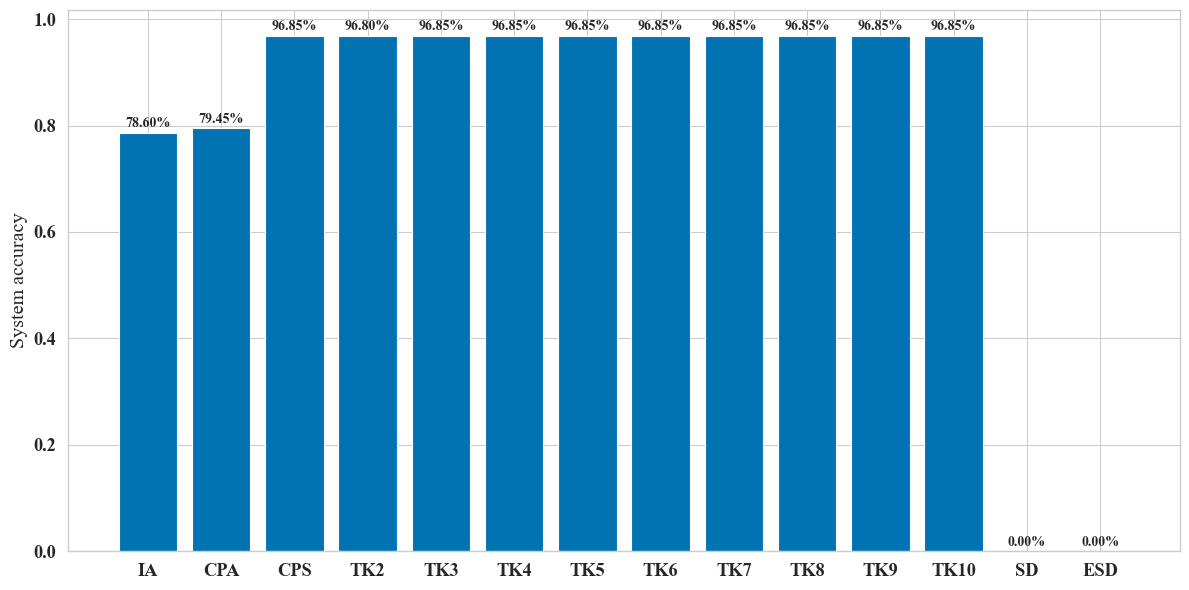

In [117]:
#plt.figure(figsize=(15, 8))
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 10}) # 10 , 12
d = df.groupby('alg_K').correct.mean().sort_index(key = sort_algorithm)
p = plt.bar(d.index, list(d))
plt.ylabel("System accuracy")
labels = ["{x:,.2f}".format(x = i*100)+"%" for i in d]
plt.bar_label(p, labels, padding = 2)
plt.savefig(FIGURES_DIR / "accB_algK_v2")

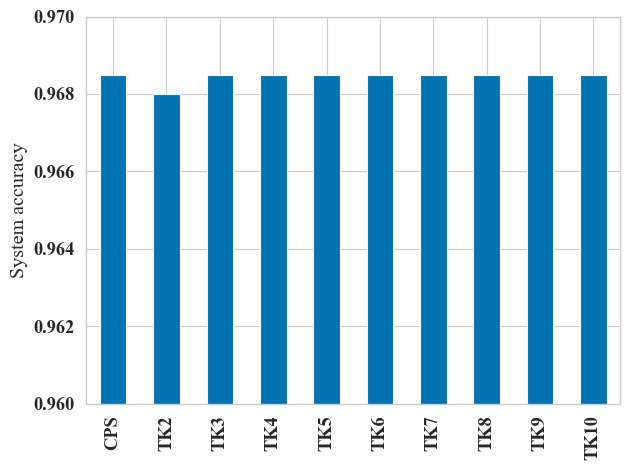

In [118]:
d = df.groupby('alg_K').correct.mean()
d = d[d > 0.9]
d.sort_index(key = sort_algorithm).plot(kind="bar", ylabel = "System accuracy", xlabel="", ylim = (0.96, 0.97)).get_figure().savefig(
    FIGURES_DIR / "accB_algK_filtered")

## Square accuracy

In [121]:
# overall model accuracy:
x = df.groupby("alg_K").agg({'correct_squares':['median', 'mean', 'std']})
x['accuracy median'] = x.correct_squares['median'] / 64
x['accuracy mean'] = x.correct_squares['mean'] / 64
x['accuracy std'] = x.correct_squares['std'] / 64
x

correct_squares                    accuracy median accuracy mean  \
               median     mean       std                                 
alg_K                                                                    
CPA              64.0  63.5720  0.860341        1.000000      0.993313   
CPS              64.0  63.9315  0.392281        1.000000      0.998930   
ESD              51.0  51.6765  3.770538        0.796875      0.807445   
IA               64.0  63.5640  0.844548        1.000000      0.993188   
SD               46.0  45.7965  4.406563        0.718750      0.715570   
TK10             64.0  63.9315  0.392281        1.000000      0.998930   
TK2              64.0  63.9315  0.387147        1.000000      0.998930   
TK3              64.0  63.9315  0.392281        1.000000      0.998930   
TK4              64.0  63.9315  0.392281        1.000000      0.998930   
TK5              64.0  63.9315  0.392281        1.000000      0.998930   
TK6              64.0  63.9315  0.392281        1.000000      0.998930   
TK7              64.0  63.9315  0.392281        1.000000      0.998930   
TK8              64.0  63.9315  0.392281        1.000000      0.998930   
TK9              64.0  63.9315  0.392281        1.000000      0.998930   

      accuracy std  
                    
alg_K               
CPA       0.013443  
CPS       0.006129  
ESD       0.058915  
IA        0.013196  
SD        0.068853  
TK10      0.006129  
TK2       0.006049  
TK3       0.006129  
TK4       0.006129  
TK5       0.006129  
TK6       0.006129  
TK7       0.006129  
TK8       0.006129  
TK9       0.006129

In [120]:
# number of squares guessed correctly:
d = df.copy()
d['correct_squares'] = df.correct_squares.apply(lambda x: str(x) if x >= 50 else str(x//10*10) + "-" + str((x//10+1)*10-1) )# "<= 50")
d = d.groupby(['alg_K', 'correct_squares']).agg({'image_path':'count'}).reset_index().pivot(
    index = 'alg_K', values = 'image_path', columns = 'correct_squares').fillna(0)
d

correct_squares,30-39,40-49,50,51,52,53,54,55,56,57,58,59,60,61,62,64
alg_K,,,,,,,,,,,,,,,,
CPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,393.0,1589.0
CPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0
ESD,0.0,690.0,205.0,199.0,96.0,114.0,143.0,168.0,124.0,102.0,95.0,52.0,12.0,0.0,0.0,0.0
IA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,419.0,1572.0
SD,158.0,1471.0,60.0,59.0,70.0,74.0,36.0,23.0,42.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
TK10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0
TK2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,59.0,1936.0
TK3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0
TK4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0


In [122]:
df.groupby('alg_K').agg({'correct_squares':['min', 'max']})

correct_squares    
                  min max
alg_K                    
CPA                60  64
CPS                60  64
ESD                45  60
IA                 60  64
SD                 36  57
TK10               60  64
TK2                60  64
TK3                60  64
TK4                60  64
TK5                60  64
TK6                60  64
TK7                60  64
TK8                60  64
TK9                60  64

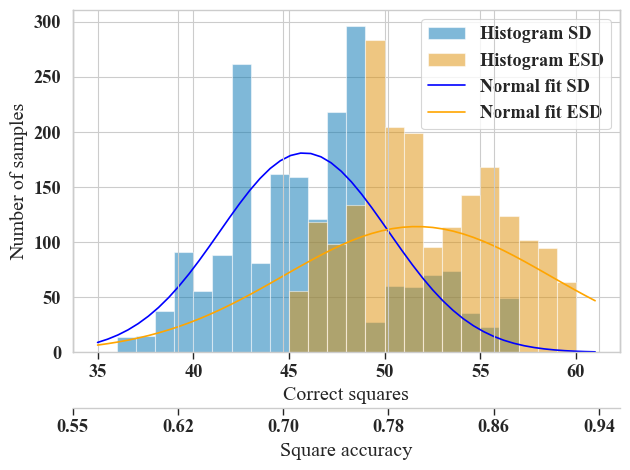

In [123]:
hist_sd = plt.hist(df[df.algorithm == 'SD'].correct_squares, density = False, bins = 57-36, label = 'Histogram SD', alpha = 0.5)
hist_esd = plt.hist(df[df.algorithm == 'ESD'].correct_squares, density = False, bins = 60-45, label = 'Histogram ESD', alpha = 0.5)

x = np.linspace(35, 61)
sd_mu = df[df.algorithm == 'SD'].correct_squares.mean()
sd_s2 = ((df[df.algorithm == 'SD'].correct_squares - sd_mu)**2).sum() / (1999)
sd_N = 1/np.sqrt(2*np.pi*sd_s2) * np.exp(-(x-sd_mu)**2/(2*sd_s2)) * 2000
esd_mu = df[df.algorithm == 'ESD'].correct_squares.mean()
esd_s2 = ((df[df.algorithm == 'ESD'].correct_squares - sd_mu)**2).sum() / (1999)
esd_N = 1/np.sqrt(2*np.pi*esd_s2) * np.exp(-(x-esd_mu)**2/(2*esd_s2)) * 2000

plt.plot(x, sd_N, color = "blue", label = "Normal fit SD")
plt.plot(x, esd_N, color = "orange", label = "Normal fit ESD")

plt.ylabel("Number of samples")
plt.xlabel("Correct squares")
plt.legend()

# add a second X axis:
ax2 = plt.gca().twiny()
ax2.set_xlim(35/64, 61/64)
ax2.set_xticks(np.arange(35, 62, 5)/64)
ax2.set_xticklabels([f'{i/64:.2f}' for i in np.arange(35, 62, 5)])
ax2.set_xlabel("Square accuracy")

# Put the second axis at the bottom
ax2.spines['bottom'].set_position(('outward', 40))
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_visible(True)
# Hide the secondary top spines
ax2.spines['top'].set_visible(False)

plt.savefig(FIGURES_DIR / "accS_hist_bf")

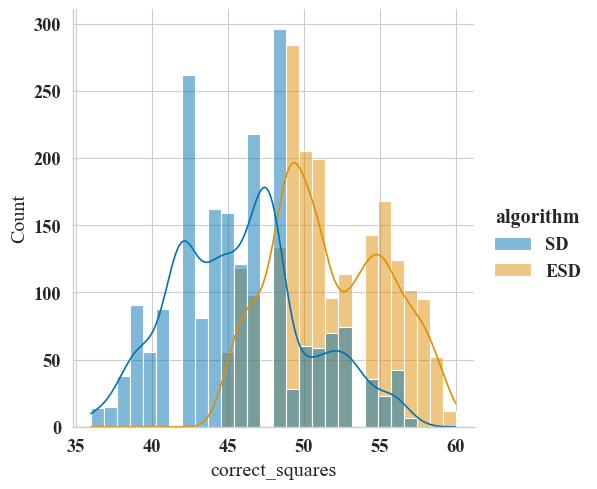

In [125]:
_ = sns.displot(data=df[df.algorithm.str.contains("SD")], x = "correct_squares", hue = "algorithm", kde = True, multiple = "layer")

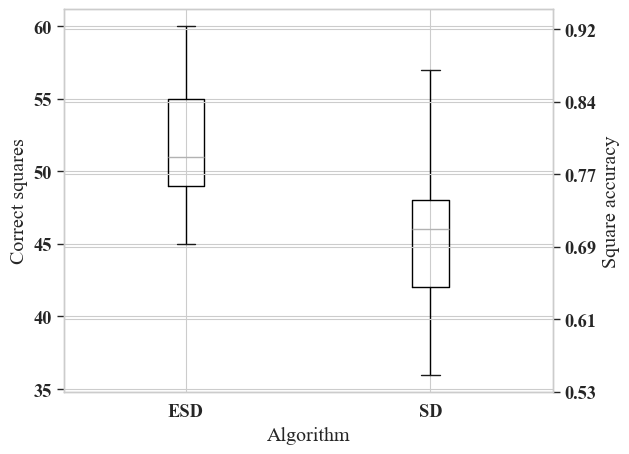

In [126]:
#df.boxplot(column = "correct_squares", by="algorithm", figsize=(20,8))
df[df.algorithm.str.contains("SD")].boxplot(column = "correct_squares", by="algorithm")
plt.title("")
plt.suptitle("")
plt.ylabel("Correct squares")
plt.xlabel("Algorithm")

# Add another Y axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(np.arange(ax1.get_ylim()[0], ax1.get_ylim()[1]+1, 5))
ax2.set_yticklabels([f'{int(y)/64:.2f}' for y in np.arange(ax1.get_ylim()[0], ax1.get_ylim()[1]+1, 5)])
ax2.set_ylabel("Square accuracy")

plt.savefig(FIGURES_DIR / "accS_boxplot_bf")

### test: compare square accuracy of SD and ESD

first test the normality:

In [127]:
SAcc_sd = df[df.algorithm == "SD"].correct_squares / 64
shapiro(SAcc_sd)

ShapiroResult(statistic=np.float64(0.9785149035512191), pvalue=np.float64(8.861191928381775e-17))

In [128]:
SAcc_esd = df[df.algorithm == "ESD"].correct_squares / 64
shapiro(SAcc_esd)

ShapiroResult(statistic=np.float64(0.9620608667576337), pvalue=np.float64(1.7803340334157683e-22))

then proceed with the comparison:

In [129]:
wilcoxon(SAcc_sd, SAcc_esd, alternative="less")

WilcoxonResult(statistic=np.float64(134550.5), pvalue=np.float64(1.0728133725050509e-234))

In [130]:
# in fact, in all samples, ESD performs better than SD
(SAcc_sd - SAcc_esd > 0).reset_index().groupby('correct_squares').index.count()

correct_squares
False    4000
Name: index, dtype: int64

### test: compare system accuracy of domaim-aware approaches

In [131]:
N = 2000
pp = df.groupby("algorithm").correct.sum() / N
pp

algorithm
CPA    0.7945
CPS    0.9685
ESD    0.0000
IA     0.7860
SD     0.0000
TK     8.7160
Name: correct, dtype: float64

In [70]:
# each algorithm behaves as a Binomial distribution: k ~ Bin(p, n=2000), accuracy = k/n, k = correct samples
# test to compare the "p" of two algorithms:

# p_hat = (k1+k2)/(n1+n2) -> if n1=n2=N -> (k1+k2)/(2N) = p1_hat/2 + p2_hat/2

# IA vs CPA
p1 = pp['IA']
p2 = pp['CPA']
ph = (p1+p2)/2
z = (p1-p2) / np.sqrt(ph*(1-ph)*2/N)
print(z)

# p-value for a left-tailed test:
scipy.stats.norm.cdf(z)

# if >0.05 -> accept H0 -> p1=p2
# if <0.05 -> reject H0 -> p1<p2

-0.6602154583208837


np.float64(0.25455778681067165)

In [72]:
# p_hat = (k1+k2)/(n1+n2) -> if n1=n2=N -> (k1+k2)/(2N) = p1_hat/2 + p2_hat/2

p1 = pp['CPA']
p2 = pp['CPS']
ph = (p1+p2)/2
z = (p1-p2) / np.sqrt(ph*(1-ph)*2/N)
print(z)

# p-value for a left-tailed test:
scipy.stats.norm.cdf(z)

# if >0.05 -> accept H0 -> p1=p2
# if <0.05 -> reject H0 -> p1<p2

-17.024678323554483


np.float64(2.6943894387213127e-65)

## prediction time

In [ ]:
# average time:
pd.concat([
    df.groupby(["alg_K"]).agg({'prediction_time':['mean', 'std', 'min', 'max', 'median']}),
    df.groupby(["alg_K"]).prediction_time.quantile(0.25),
    df.groupby(["alg_K"]).prediction_time.quantile(0.75)
], axis = 1)

In [ ]:
# prediction time:
#plt.figure(figsize = (16,6))
plt.figure(figsize = (12,6))
plt.figure(figsize = (8,4))

for alg in ['IA', 'CPA', 'CPP', 'CPS', 'SD', 'ESD']: # to sort them in the order i want
#for alg in [ 'TK2', 'TK10']: # to sort them in the order i want
  if alg != "TK":
    x = df[df.alg_K == alg].prediction_time
    x = x[(x <= x.median() + 1.5*(x.quantile(0.75)-x.quantile(0.25))) & (x >= x.median() - 1.5*(x.quantile(0.75)-x.quantile(0.25)))] # remove the outliers
    #plt.hist(x, density = False, bins = 30, alpha=1, label=alg, histtype="step") #  range = (0,2)
    plt.hist(x, density = False, bins = 160, range=(0, 1.6), alpha=1, label=alg, histtype="step") #  range = (0,2)
    #plt.hist(x, density = True, alpha=1, bins = 30, label=alg, histtype="step") #  range = (0,2)
    plt.legend()
    # hay algunos pocos puntos más allá del 2 en realida

plt.ylabel("Number of samples")
plt.xlabel("Time (s)")
plt.savefig("time_hist_noTK_noOut.pdf", format="pdf", bbox_inches='tight')
plt.savefig("time_hist_noTK_noOut.png", format="png", bbox_inches='tight', transparent=True)

In [ ]:
d = df[df.alg_K == 'CPA']
d = d[d.prediction_time < 1]
shapiro(d.prediction_time)

In [ ]:
df.boxplot(column = "prediction_time", by="alg_K", positions = [13,14,1,3,2,0, 12,4,5,6,7,8,9,10,11],
                                 figsize=(10,5))

plt.title("")
plt.suptitle("")
plt.ylabel("Time (s)")
plt.xlabel("Algorithm")
plt.savefig("time_boxplot_all.pdf", format="pdf", bbox_inches='tight')
plt.savefig("time_boxplot_all.png", format="png", bbox_inches='tight', transparent=True)

In [ ]:
df[df.algorithm != "TK"].boxplot(column = "prediction_time", by="algorithm",
                                 positions = [4,5,1,3,2,0], # to order the plots
                                 figsize=(10,5)) # 14,8

plt.title("")
plt.suptitle("")
plt.ylabel("Time (s)")
plt.xlabel("Algorithm")
plt.savefig("time_boxplot_noTK.pdf", format="pdf", bbox_inches='tight')

In [ ]:
# change to integer for better visualization
x = df[df.algorithm=="TK"]
x['K'] = x['K'].apply(int)

x.boxplot(column = "prediction_time", by="K", figsize=(10,5))

plt.title("")
plt.suptitle("")
plt.ylabel("Time (s)")
plt.xlabel("K")

plt.savefig("time_boxplot_TK.pdf", format="pdf", bbox_inches='tight')

# the values are obtained later, with a linear regression
plt.plot(np.array([1,2,3,4,5,6,7,8,9]), np.array([2,3,4,5,6,7,8,9,10])*0.02063736750000528+0.2938751394444067, color='r') # median
#plt.plot(np.array([1,2,3,4,5,6,7,8,9]), np.array([2,3,4,5,6,7,8,9,10])*0.01852690808249981+0.2946412627994451, color='g') # mean

plt.savefig("time_boxplot_TK_line.pdf", format="pdf", bbox_inches='tight')

In [ ]:
df['log_prediction_time'] = np.log(df['prediction_time'])
df['sqrt_prediction_time'] = np.sqrt(df['prediction_time'])

In [ ]:
df.boxplot(column = "log_prediction_time", by="alg_K", figsize=(20,8))

### test: compare time of CPA, CPP, CPS

first, test normality:

In [ ]:
d = df.pivot(index = ['previous_fen', 'image_path'], values = 'prediction_time', columns = 'alg_K').reset_index()

In [ ]:
print(shapiro(d.CPA))
print(shapiro(d.CPP))
print(shapiro(d.CPS))

then compare medians (Wilcoxon test) and dispersions (Fligner test), with and without outliers:

(here we also have Levene's test, although it's not used)

In [ ]:
print("Wilcoxon test - compare medians")
print(wilcoxon(d.CPA, d.CPP, alternative="two-sided"))
print(wilcoxon(d.CPA, d.CPS, alternative="two-sided"))
print(wilcoxon(d.CPP, d.CPS, alternative="two-sided"))

print("Levene's test - compare variances")
print(levene(np.array(d.CPA), np.array(d.CPP)))
print(levene(np.array(d.CPA), np.array(d.CPS)))
print(levene(np.array(d.CPP), np.array(d.CPS)))

# levene without outliers:
cp02 = d.CPA[(d.CPA > 0.214) & (d.CPA < 0.653)]
cpp2 = d.CPA[(d.CPP > 0.254) & (d.CPP < 0.793)]
cpc2 = d.CPA[(d.CPS > 0.253) & (d.CPS < 0.784)]
print("Levene without outliers")
print(levene(np.array(cp02), np.array(cpp2)))
print(levene(np.array(cp02), np.array(cpc2)))
print(levene(np.array(cpp2), np.array(cpc2)))

print("Fligner test - compare IQR")
print(fligner(d.CPA, d.CPP))
print(fligner(d.CPA, d.CPS))
print(fligner(d.CPP, d.CPS))


In [ ]:
# without outliers:
dd = d[d.CPP < 0.793]
dd = dd[dd.CPA < 0.653]
dd = dd[dd.CPP > 0.254]
dd = dd[dd.CPA > 0.214]
print(wilcoxon(dd.CPP, dd.CPA, alternative="two-sided"))
print(fligner(dd.CPA, dd.CPP))

dd = d[d.CPS < 0.784]
dd = dd[dd.CPA < 0.653]
dd = dd[dd.CPS > 0.253]
dd = dd[dd.CPA > 0.214]
print(wilcoxon(dd.CPA, dd.CPS, alternative="two-sided"))
print(fligner(dd.CPA, dd.CPS))

dd = d[d.CPP < 0.793]
dd = dd[dd.CPS < 0.784]
dd = dd[dd.CPP > 0.254]
dd = dd[dd.CPS > 0.253]
print(wilcoxon(dd.CPP, dd.CPS, alternative="two-sided"))
print(fligner(dd.CPP, dd.CPS))


### test: analyze the linear behaviour of K in top-K

In [ ]:
from scipy.stats import linregress

In [ ]:
# tried both with mean and median
time_k = df.groupby('K').prediction_time.mean().reset_index()
time_k = df.groupby('K').prediction_time.median().reset_index()

In [ ]:
# regression for the mean/median time of each K: (very linear fit)
linregress(x=time_k.K, y=time_k.prediction_time)

In [ ]:
# regression with all the samples of each K: (the R2 is reduced)
d = df[df.algorithm == "TK"]
linregress(x=d.K, y=d.prediction_time)

In [ ]:
plt.scatter(d.K, d.prediction_time)

## energy

In [ ]:
df.columns

In [ ]:
df.groupby('alg_K').agg({'energy_cpu':['median', 'mean', 'std'], 'energy_gpu':['median', 'mean', 'std'],
                         'energy_ram':['median', 'mean', 'std'], 'energy_total':['median', 'mean', 'std']}).round(2)

In [ ]:
d = df.groupby('alg_K').agg({'energy_cpu':'median', 'energy_gpu':'median', 'energy_ram':'median', 'energy_total':'median'}).sort_index(key = sort_algorithm)
d.head()

In [ ]:
plt.figure(figsize=(8, 6))
p = plt.bar(d.index, d.energy_cpu)
plt.ylabel("CPU energy (J)")
labels = ["{x:,.2f}".format(x = i)+"" for i in d.energy_cpu]
plt.bar_label(p, labels, padding = 2)

plt.savefig("energy_cpu_bars.pdf", format="pdf", bbox_inches='tight')

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
p = plt.barh(d.index, d.energy_cpu)
plt.xlabel("CPU energy (J)")
labels = ["{x:,.2f}".format(x = i)+"" for i in d.energy_cpu]
plt.bar_label(p, labels, padding = 2)
plt.gca().invert_yaxis()
plt.xlim(0, 28)

plt.savefig("energy_cpu_hbars.pdf", format="pdf", bbox_inches='tight')
plt.rcParams.update({'font.size': 10})

In [ ]:
plt.figure(figsize=(8, 6))
p = plt.bar(d.index, d.energy_gpu)
plt.ylabel("GPU energy (J)")
labels = ["{x:,.2f}".format(x = i)+"" for i in d.energy_gpu]
plt.bar_label(p, labels, padding = 2)

plt.savefig("energy_gpu_bars.pdf", format="pdf", bbox_inches='tight')

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
p = plt.barh(d.index, d.energy_gpu)
plt.xlabel("GPU energy (J)")
labels = ["{x:,.2f}".format(x = i)+"" for i in d.energy_gpu]
plt.bar_label(p, labels, padding = 2)
plt.gca().invert_yaxis()
plt.xlim(0, 6.5)

plt.savefig("energy_gpu_hbars.pdf", format="pdf", bbox_inches='tight')
plt.rcParams.update({'font.size': 10})

In [ ]:
plt.figure(figsize=(8, 6))
p = plt.bar(d.index, d.energy_ram)
plt.ylabel("RAM energy (J)")
labels = ["{x:,.2f}".format(x = i)+"" for i in d.energy_ram]
plt.bar_label(p, labels, padding = 2)

plt.savefig("energy_ram_bars.pdf", format="pdf", bbox_inches='tight')

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
p = plt.barh(d.index, d.energy_ram)
plt.xlabel("RAM energy (J)")
labels = ["{x:,.2f}".format(x = i)+"" for i in d.energy_ram]
plt.bar_label(p, labels, padding = 2)
plt.gca().invert_yaxis()
plt.xlim(0, 34)

plt.savefig("energy_ram_hbars.pdf", format="pdf", bbox_inches='tight')
plt.rcParams.update({'font.size': 10})

In [ ]:
plt.bar(d.index, d.energy_cpu, label = "CPU")
plt.bar(d.index, d.energy_gpu, bottom = d.energy_cpu, label = "GPU")
plt.bar(d.index, d.energy_ram, bottom = d.energy_cpu + d.energy_gpu, label = "RAM")
plt.legend()

In [ ]:
plt.rcParams.update({'font.size': 16}) # 13 for the slides
plt.figure(figsize=(8, 6)) # (10,6) for the slides
p1 = plt.barh(d.index, d.energy_cpu, label = "CPU", alpha = 0.6)
p2 = plt.barh(d.index, d.energy_gpu, left = d.energy_cpu, label = "GPU", alpha = 0.6)
p3 = plt.barh(d.index, d.energy_ram, left = d.energy_cpu + d.energy_gpu, label = "RAM", alpha = 0.6)
plt.legend()
plt.xlabel("Total energy (J)")

# for the percentages:
d2 = d[['energy_cpu', 'energy_gpu', 'energy_ram']]
d2 = d2.div(d2.sum(axis=1), axis=0)
labels_c = ["{x:,.2f}".format(x = 100*i)+"%" for i in d2.energy_cpu]
labels_g = ["{x:,.2f}".format(x = 100*i)+"%" for i in d2.energy_gpu]
labels_r = ["{x:,.2f}".format(x = 100*i)+"%" for i in d2.energy_ram]

# add the labels
l1 = plt.bar_label(p1, labels_c, label_type='center', fontsize = 11)
l1[0].set_x(5)
l2 = plt.bar_label(p2, labels_g, label_type='center', fontsize = 11)
l2[0].set_x(15)
plt.bar_label(p3, labels_r, label_type='center', fontsize = 11)
# ajust axis
plt.gca().invert_yaxis()
plt.xlim(0, 63)

plt.savefig("energy_total_hbars.pdf", format="pdf", bbox_inches='tight')
plt.savefig("energy_total_hbars.png", format="png", bbox_inches='tight', transparent=True)
plt.rcParams.update({'font.size': 10})

In [ ]:
# since i cant find how to make the circles smaller, make everything else twice as large
plt.rcParams.update({'font.size': 20})

df.boxplot(column = "energy_cpu", by="alg_K", positions = [13,14,1,3,2,0, 12,4,5,6,7,8,9,10,11],
                                 figsize=(20,9.4)) # 10,5  14,8

plt.title("")
plt.suptitle("")
plt.ylabel("CPU energy (J)")
plt.xlabel("Algorithm")
plt.savefig("energy_cpu_boxplot.pdf", format="pdf", bbox_inches='tight')

plt.rcParams.update({'font.size': 10})

In [ ]:
plt.rcParams.update({'font.size': 20})

df.boxplot(column = "energy_gpu", by="alg_K", positions = [13,14,1,3,2,0, 12,4,5,6,7,8,9,10,11],
                                 figsize=(20,9.4)) # 10,5  14,8

plt.title("")
plt.suptitle("")
plt.ylabel("GPU energy (J)")
plt.xlabel("Algorithm")
plt.savefig("energy_gpu_boxplot.pdf", format="pdf", bbox_inches='tight')

plt.rcParams.update({'font.size': 10})

In [ ]:
plt.rcParams.update({'font.size': 20})

df.boxplot(column = "energy_ram", by="alg_K", positions = [13,14,1,3,2,0, 12,4,5,6,7,8,9,10,11],
                                 figsize=(20,9.4)) # 10,5  14,8

plt.title("")
plt.suptitle("")
plt.ylabel("RAM energy (J)")
plt.xlabel("Algorithm")
plt.savefig("energy_ram_boxplot.pdf", format="pdf", bbox_inches='tight')

plt.rcParams.update({'font.size': 10})

In [ ]:
plt.rcParams.update({'font.size': 20})

df.boxplot(column = "energy_total", by="alg_K", positions = [13,14,1,3,2,0, 12,4,5,6,7,8,9,10,11],
                                 figsize=(20,9.4)) # 10,5  14,8

plt.title("")
plt.suptitle("")
plt.ylabel("Total energy (J)")
plt.xlabel("Algorithm")
plt.savefig("energy_total_boxplot.pdf", format="pdf", bbox_inches='tight')

plt.rcParams.update({'font.size': 10})

In [ ]:
df[df.algorithm=="TK"].boxplot(column = "energy_total", by="K", figsize=(20,8))

### test: total energy of SD vs other algorithmic approaches

In [ ]:
E_bf1 = df[df.alg_K == "SD"].energy_total

for a in df.alg_K.unique():
  if a != "SD" and a != "ESD":
    E_x = df[df.alg_K == a].energy_total
    print(a, wilcoxon(E_bf1, E_x, alternative="greater"))

### test: compare total energy of all algorithmic approaches

In [ ]:
# first, including outliers
alg_Ks = df.alg_K.unique()
aa = [a for a in alg_Ks if not 'BF' in a]
samples = [np.array(df[df.alg_K == a].energy_total) for a in aa]
kruskal(*samples)

In [ ]:
# now without the outliers
samples = []
for a in aa:
  x = df[df.alg_K == a].energy_gpu
  x = x[(x <= x.median() + 1.5*(x.quantile(0.75)-x.quantile(0.25))) & (x >= x.median() - 1.5*(x.quantile(0.75)-x.quantile(0.25)))] # remove the outliers
  samples.append(np.array(x))
kruskal(*samples)

In [ ]:
# post-hoc test
p_values = sp.posthoc_dunn(df[~df.alg_K.str.contains('BF')], val_col = "energy_total", group_col = "alg_K", p_adjust='holm')
sns.heatmap(p_values.sort_index(key = sort_algorithm).sort_index(key = sort_algorithm, axis=1)).get_figure().savefig(
    "energy_total_dunn.pdf", format="pdf", bbox_inches='tight')

print(p_values)

In [ ]:
# post-hoc test
plt.figure(figsize=(4,4))
p_values = sp.posthoc_dunn(df[~df.alg_K.str.contains('BF')], val_col = "energy_total", group_col = "alg_K", p_adjust='holm')

sns.heatmap((p_values > 0.05).sort_index(key = sort_algorithm).sort_index(key = sort_algorithm, axis=1), cbar=False)

### test: compare GPU energy of all methods

GPU is the component with the lowest contribution to the total energy. however, the motivation to test this is because all the boxplots for all algorithms look pretty similar

In [ ]:
# first, including outliers
alg_Ks = df.alg_K.unique()
samples = [np.array(df[df.alg_K == a].energy_gpu) for a in alg_Ks]
kruskal(*samples)

In [ ]:
# now without the outliers
samples = []
for a in alg_Ks:
  x = df[df.alg_K == a].energy_gpu
  x = x[(x <= x.median() + 1.5*(x.quantile(0.75)-x.quantile(0.25))) & (x >= x.median() - 1.5*(x.quantile(0.75)-x.quantile(0.25)))] # remove the outliers
  samples.append(np.array(x))
kruskal(*samples)

In [ ]:
# post-hoc test
p_values = sp.posthoc_dunn(df, val_col = "energy_gpu", group_col = "alg_K", p_adjust='holm')
sns.heatmap(p_values.sort_index(key = sort_algorithm).sort_index(key = sort_algorithm, axis=1)).get_figure().savefig(
    "energy_gpu_dunn.pdf", format="pdf", bbox_inches='tight')

print(p_values)

In [ ]:
# post-hoc test
p_values = sp.posthoc_dunn(df, val_col = "energy_gpu", group_col = "alg_K", p_adjust='holm')
sns.heatmap((p_values > 0.05).sort_index(key = sort_algorithm).sort_index(key = sort_algorithm, axis=1))

In [ ]:
alg_Ks

In [ ]:
# check maximal set:
alg_Ks = ['IA', 'CPA', 'CPS', 'CPP', 'SD', 'ESD', 'TK2', 'TK3', 'TK4', 'TK5', 'TK6', 'TK7', 'TK8', 'TK9', 'TK10']
alg_Ks = ['CPS', 'CPP', 'TK2', 'TK3', 'TK4', 'TK5', 'TK6', 'TK7', 'TK8']
samples = [np.array(df[df.alg_K == a].energy_gpu) for a in alg_Ks]
kruskal(*samples)


# Multivariate analysis

## at algorithm level

In [ ]:
d = df.groupby('alg_K').agg({'correct_squares':'mean', 'correct':'mean', 'prediction_time':'mean', 'energy_total':'mean'}).sort_index(
    key = sort_algorithm).rename(columns = {'correct_squares':'Square accuracy', 'correct': 'Board accuracy', 'prediction_time': 'Prediction time (s)',
                                            'energy_total': 'Total energy (J)'})
d['Square accuracy'] = d['Square accuracy'] / 64
d['File size (MiB)'] = d.index.map(lambda x: 1 if x in ['IA', 'SD', 'CPA']
                          else (2 if x in ['CPS', 'CPP'] or x.startswith('TK')
                          else 3)) * 249
d.corr()

In [ ]:
d

In [ ]:
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'P', 'd', '8']
palette = sns.color_palette("husl", len(d))  # Generates a color palette

# Create a list of metrics for the scatter plot (including 'size')
metrics = ['Board accuracy', 'Prediction time (s)', 'Total energy (J)', 'File size (MiB)']

# Initialize the figure and create the triangular grid
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Plot scatter plots only in the lower-left triangle
for i in range(1, 4):  # Rows (from time down to size)
    for j in range(i):  # Columns (correct to the leftmost position)
        ax = axes[i-1, j]  # Use i-1 because row 1 starts at index 0
        for idx, (alg, row) in enumerate(d.iterrows()):
            # Add jitter to avoid exact overlap
            jitter_x = np.random.normal(0,0)# 0.01)
            jitter_y = np.random.normal(0,0)# 0.01)
            ax.scatter(row[metrics[j]] + jitter_x, row[metrics[i]] + jitter_y,
                       label=alg, marker=markers[idx], s=100,
                       c=[palette[idx]], alpha=0.7, edgecolor='black', linewidth=0.5)  # Add transparency and border

        if i == 3:  # Bottom row should have X-axis labels
            ax.set_xlabel(metrics[j])
        if j == 0:  # Leftmost column should have Y-axis labels
            ax.set_ylabel(metrics[i])

# Remove upper-right plots and use that space for the legend
for i in range(3):
    for j in range(i+1, 3):
        fig.delaxes(axes[i, j])

# Add a single legend in the empty space in the upper-right corner
handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center', ncol=5, title='Algorithm')
ax5 = fig.add_subplot(3, 3, 2)
ax5.legend(handles=handles, labels=labels,
           fontsize=10, ncol=3, loc='center',
           frameon=True, title = "Algorithm")
ax5.axis('off')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend at the top
#plt.show()

plt.savefig("multi_algorithms_scatter.pdf", format="pdf", bbox_inches='tight')

In [ ]:
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'P', 'd', '8']
palette = sns.color_palette("husl", len(d))  # Generates a color palette

# Create a list of metrics for the scatter plot (including 'size')
metrics = ['Prediction time (s)', 'Total energy (J)']

# Initialize the figure and create the triangular grid
fig, axes = plt.subplots(1, 1, figsize=(5, 4))

# Plot scatter plots only in the lower-left triangle
i = 1
j = 0
ax = axes#[j]
for idx, (alg, row) in enumerate(d.iterrows()):
    # Add jitter to avoid exact overlap
    jitter_x = np.random.normal(0,0)# 0.01)
    jitter_y = np.random.normal(0,0)# 0.01)
    plt.scatter(row[metrics[j]] + jitter_x, row[metrics[i]] + jitter_y,
                label=alg, marker=markers[idx], s=100,
                c=[palette[idx]], alpha=0.7, edgecolor='black', linewidth=0.5)  # Add transparency and border

plt.xlabel(metrics[j])
plt.ylabel(metrics[i])


# Add a single legend in the empty space in the upper-right corner
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Algorithm")

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend at the top
#plt.show()

plt.savefig("multi_algorithms_scatter_one.pdf", format="pdf", bbox_inches='tight')
plt.savefig("multi_algorithms_scatter_one.png", format="png", bbox_inches='tight', transparent=True)

In [ ]:
d1 = df.groupby('alg_K').agg({'correct_squares':['mean','median'], 'correct':'mean', 'prediction_time':['mean','median'], 'energy_total':['mean','median']}).sort_index(
    key = sort_algorithm).rename(columns = {'correct_squares':'Square accuracy', 'correct': 'Board accuracy', 'prediction_time': 'Prediction time (s)',
                                            'energy_total': 'Total energy (J)'})
d1['Square accuracy'] = d1['Square accuracy'] / 64
d1['File size (MiB)'] = d1.index.map(lambda x: 1 if x in ['IA', 'SD', 'CPA']
                          else (2 if x in ['CPS', 'CPP'] or x.startswith('TK')
                          else 3)) * 249
d1

## at sample level

In [ ]:
for alg in ['IA', 'CPA', 'CPP', 'CPS', 'TK2', 'TK3', 'TK4', 'TK5', 'TK6', 'TK7', 'TK8', 'TK9', 'TK10', 'SD', 'ESD']:
  print(alg)
  d = df[df.alg_K == alg]
  print(np.corrcoef(d.energy_total, d.prediction_time)[0,1])

In [ ]:
legend = True
for alg in ['IA', 'CPA', 'CPP', 'CPS', 'TK2', 'TK3', 'TK4', 'TK5', 'TK6', 'TK7', 'TK8', 'TK9', 'TK10']:
  for legend in [True, False]:
    #print(alg)
    plt.figure()
    d = df[df.alg_K == alg]
    alpha = 0.5 if alg in ['IA', 'CPA'] else 1

    plt.scatter(x=d[d.correct].prediction_time, y=d[d.correct].energy_total,
                c='blue', s=1, alpha=0.1, label='Correct')
    plt.scatter(x=d[~d.correct].prediction_time, y=d[~d.correct].energy_total,
                c='orange', s=1, alpha=alpha, label='Incorrect')
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")

    if legend:
      leg = plt.legend(loc = "lower right")
      leg.legend_handles[0]._sizes = [30]
      leg.legend_handles[1]._sizes = [30]

    name = f"multi_{alg}_" + ("legend" if legend else "noLegend") + ".pdf"
    plt.savefig(name, format="pdf", bbox_inches='tight')
    plt.savefig(name.replace(".pdf", ".png"), format="png", bbox_inches='tight', transparent=True)

In [ ]:
legend = True
for alg in ['IA', 'CPA', 'CPP', 'CPS', 'TK2', 'TK3', 'TK4', 'TK5', 'TK6', 'TK7', 'TK8', 'TK9', 'TK10']:
  for legend in [True, False]:
    #print(alg)
    plt.figure(figsize = (4,3))
    d = df[df.alg_K == alg]
    alpha = 0.5 if alg in ['IA', 'CPA'] else 1

    plt.scatter(x=d[d.correct].prediction_time, y=d[d.correct].energy_total,
                c='blue', s=0.5, alpha=0.1, label='Correct')
    plt.scatter(x=d[~d.correct].prediction_time, y=d[~d.correct].energy_total,
                c='orange', s=0.5, alpha=alpha, label='Incorrect')
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    #plt.xlim((0, 1.2))
    #plt.ylim((15,55))

    if legend:
      leg = plt.legend(loc = "lower right")
      leg.legend_handles[0]._sizes = [30]
      leg.legend_handles[1]._sizes = [30]

    name = f"multi_{alg}_" + ("legend" if legend else "noLegend") + "_v2.pdf"
    #name = f"multi_{alg}_" + ("legend" if legend else "noLegend") + "_commonLimits.pdf"
    plt.savefig(name, format="pdf", bbox_inches='tight')

In [ ]:
for alg in ['SD', 'ESD']:
  d = df[df.alg_K == alg]
  plt.figure()

  plt.scatter(x=d.prediction_time, y=d.energy_total, c=d.correct_squares, s=1, alpha=0.5)
  plt.colorbar()
  plt.xlabel("Time (s)")
  plt.ylabel("Energy (J)")

  name = f"multi_{alg}.pdf"
  plt.savefig(name, format="pdf", bbox_inches='tight')
  plt.savefig(name.replace(".pdf", ".png"), format="png", bbox_inches='tight', transparent=True)

In [ ]:
for alg in ['SD', 'ESD']:
  d = df[df.alg_K == alg]
  #d = d[d.prediction_time]
  plt.figure(figsize = (4,3))

  plt.scatter(x=d.prediction_time, y=d.energy_total, c=d.correct_squares, s=0.3, alpha=0.5)
  plt.colorbar()
  plt.xlabel("Time (s)")
  plt.ylabel("Energy (J)")

  name = f"multi_{alg}_v2.pdf"
  plt.savefig(name, format="pdf", bbox_inches='tight')

# Other variables

In [ ]:
import statsmodels.api as sm

In [ ]:
df.columns

In [ ]:
df['pieces_total'] = df.pieces_white + df.pieces_black
df['pieces_turn'] = np.where(df.turn=="white", df.pieces_white, df.pieces_black)
df['turn_binary'] = df.turn.map({'white':1, 'black':0})
df['correctness'] = np.where(df.alg_K.str.contains('BF'), df.correct_squares/64, 1*df.correct)

## table of correlations

In [ ]:
tbl = pd.DataFrame()
tbls = []
#for alg in ['IA', 'CPS', 'TK3', 'ESD']:
for alg in df.alg_K.unique():
  d = df[df.alg_K == alg]
  for v1 in ['prediction_time', 'correctness']:
    method = 'spearman' if (v1=='correctness' and not 'BF' in alg) else 'pearson'
    cor = d[['legal_moves', 'pieces_turn', 'pieces_total']].corrwith(d[v1], method=method)
    cor = pd.DataFrame(cor, columns = ["c"]).reset_index()
    cor.rename(columns={'index':'var'}, inplace=True)
    cor['metric'] = v1
    cor['alg'] = alg
    tbls.append(cor)

tbl = pd.concat(tbls)
tbl = tbl.pivot(columns = ['metric', 'var'], index = ['alg'], values = ['c'])
tbl



In [ ]:
df.pieces_white.corr(df.pieces_black)
# problem: very strong correlation between number of white and black pieces
# this means that columns of 'pieces_turn' and 'pieces_total' in the previous table are essentially the same

In [ ]:
df['from_color'] = df.true_move_uci.apply(lambda x: (ord(x[0])+int(x[1])) % 2) # 1 if white, 0 if black
df['to_color'] = df.true_move_uci.apply(lambda x: (ord(x[2])+int(x[3])) % 2) # 1 if white, 0 if black
df.groupby(['turn', 'from_color', 'to_color', 'alg_K']).agg({'correctness':'mean'}).reset_index().pivot(index = 'alg_K', values = 'correctness', columns = ['turn', 'from_color', 'to_color'])